In [3]:
import mxnet as mx
import gluoncv as cv
from mxnet.gluon import nn
import matplotlib.pyplot as plt

layer = nn.Conv2D(
    channels=1,
    kernel_size=(3, 3),
    in_channels=1,
    strides=(1, 1),
    padding=(0, 0),
    activation='relu',
    prefix='conv_'
)

layer

Conv2D(1 -> 1, kernel_size=(3, 3), stride=(1, 1), Activation(relu))

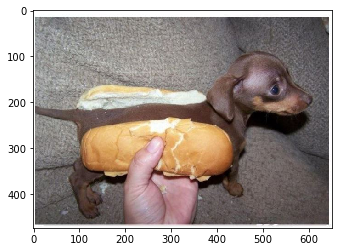

In [4]:
img = plt.imshow(plt.imread('stock\dnothotdog.jpg'))

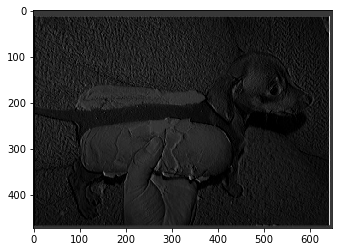

In [5]:
layer.initialize(mx.init.Constant(
    [
        [-1,0,2],
        [-2,0,2],
        [-1,0,1]
    ]
))

image = mx.image.imread('stock\dnothotdog.jpg',0).astype('float32')
image_chn_first = image.transpose((2,0,1))
image_batchfield = image_chn_first.expand_dims(axis=0)
output = layer(image_batchfield)
o = plt.imshow(output.squeeze().asnumpy(),cmap='gray')

In [6]:
layer.collect_params()

layer.weight.data()

layer.bias.data()


[0.]
<NDArray 1 @cpu(0)>

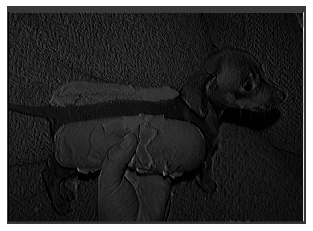

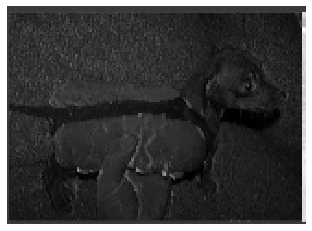

In [7]:
layer = nn.MaxPool2D(pool_size=(4,4))
layer
pooled = layer(output)
plt.imshow(output.squeeze().asnumpy(),cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(pooled.squeeze().asnumpy(), cmap='gray')
o = plt.axis('off')

In [8]:
layer = nn.Dense(units=10,in_units=3,activation='relu')
layer.initialize(mx.init.One())
inputs = mx.nd.ones((1,3))
inputs, layer(inputs)

layer.weight.data()

layer.bias.data()


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<NDArray 10 @cpu(0)>

In [9]:
layer = nn.Conv2D(channels=512,in_channels=512,kernel_size=(3,3))
layer.initialize(mx.init.Xavier())
layer.weight.data()[0]


[[[ 0.002491    0.00473796  0.01098134]
  [ 0.01756824  0.00524412  0.01826634]
  [ 0.00229044  0.01772061 -0.00389598]]

 [[ 0.00630558  0.00744513 -0.00590012]
  [-0.00318499 -0.01033202  0.01999258]
  [-0.0226214   0.02366119 -0.01160159]]

 [[-0.0059481  -0.00113977  0.01488703]
  [ 0.01593029  0.00147454 -0.00102179]
  [ 0.00347238 -0.0054713   0.02171864]]

 ...

 [[-0.01893761  0.01284147 -0.00975751]
  [-0.02142992 -0.00148998 -0.00093406]
  [ 0.00985651 -0.00277236  0.00710726]]

 [[ 0.00880146 -0.01043105 -0.00261599]
  [-0.00773894  0.01042632 -0.01882804]
  [ 0.00926955  0.00075613  0.01006069]]

 [[ 0.00549796  0.00605232 -0.0150173 ]
  [-0.01781082  0.02513626  0.01330902]
  [-0.01826004  0.01434206  0.0111638 ]]]
<NDArray 512x3x3 @cpu(0)>

In [10]:
layer = nn.Conv2D(channels=1, kernel_size=(3,3))
layer.weight

layer.initialize(mx.init.Xavier())
layer(mx.nd.ones((1,8,224,224)))
layer.weight

Parameter conv1_weight (shape=(1, 8, 3, 3), dtype=<class 'numpy.float32'>)

In [14]:
layer = nn.Conv2D(channels=1, kernel_size=(3,3))
layer.initialize(mx.init.Xavier(), ctx=mx.cpu())
layer(mx.nd.uniform(shape=(1,3,9,9),ctx=mx.cpu()))


[[[[0.40954387 1.064873   1.1331341  0.64885765 0.9804699  0.23455964
    0.9940427 ]
   [0.79972154 0.69442797 0.88772833 0.10820508 0.9749175  1.3025181
    0.55004257]
   [0.72224647 0.49193695 0.7968111  0.5789589  0.43560836 0.8870081
    0.29508054]
   [0.11022836 0.85602474 0.4759889  0.5764466  1.1748923  1.1894249
    0.8850965 ]
   [0.63172704 0.29604807 0.85113794 0.5395459  1.0623015  1.6064607
    0.9113622 ]
   [0.77122766 1.0426652  0.45200074 1.0053816  0.6306113  1.5461228
    0.93191224]
   [1.2661488  0.72553307 0.8800445  0.9588479  0.45714983 1.0297927
    1.1313344 ]]]]
<NDArray 1x1x7x7 @cpu(0)>

In [12]:
layer.weight.set_data(mx.nd.ones((1,3,3,3)))
layer.weight.data()


[[[[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]

  [[1. 1. 1.]
   [1. 1. 1.]
   [1. 1. 1.]]]]
<NDArray 1x3x3x3 @cpu(0)>